Building a Resume Parser Using NLP and Machine Learning.**

# Importing the Libraries

In [1]:
import pandas
import spacy
import nltk
import matplotlib.pyplot as plt
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
import re

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Displaying the skills required

In [2]:
skills="Data mining or extracting usable data from valuable data sources Using machine learning tools to select features, create and optimize classifiers Carrying out preprocessing of structured and unstructured data Enhancing data collection procedures to include all relevant information for developing analytic systems Processing, cleansing, and validating the integrity of data to be used for analysis Analyzing large amounts of information to find patterns and solutions Developing prediction systems and machine learning algorithms Presenting results in a clear manner Propose solutions and strategies to tackle business challenges Collaborate with Business and IT teams Become a Data Science Expert & Get Your Dream Job Professional Certificate Program In Data ScienceEXPLORE PROGRAMBecome a Data Science Expert & Get Your Dream Job Data Scientist Skills You need to master the skills required for data scientist jobs in various industries and organizations if you want to pursue a data scientist career. Let’s look at the must-have data scientist qualifications. Key skills needed to become a data scientist: Programming Skills – knowledge of statistical programming languages like R, Python, and database query languages like SQL, Hive, Pig is desirable. Familiarity with Scala, Java, or C++ is an added advantage. Statistics – Good applied statistical skills, including knowledge of statistical tests, distributions, regression, maximum likelihood estimators, etc. Proficiency in statistics is essential for data-driven companies. Machine Learning – good knowledge of machine learning methods like k-Nearest Neighbors, Naive Bayes, SVM, Decision Forests. Strong Math Skills (Multivariable Calculus and Linear Algebra) - understanding the fundamentals of Multivariable Calculus and Linear Algebra is important as they form the basis of a lot of predictive performance or algorithm optimization techniques. Data Wrangling – proficiency in handling imperfections in data is an important aspect of a data scientist job description. Experience with Data Visualization Tools like matplotlib, ggplot, d3.js., Tableau that help to visually encode data Excellent Communication Skills – it is incredibly important to describe findings to a technical and non-technical audience. Strong Software Engineering Background Hands-on experience with data science tools Problem-solving aptitude Analytical mind and great business sense Degree in Computer Science, Engineering or relevant field is preferred Proven Experience as Data Analyst or Data Scientist"
skills

'Data mining or extracting usable data from valuable data sources Using machine learning tools to select features, create and optimize classifiers Carrying out preprocessing of structured and unstructured data Enhancing data collection procedures to include all relevant information for developing analytic systems Processing, cleansing, and validating the integrity of data to be used for analysis Analyzing large amounts of information to find patterns and solutions Developing prediction systems and machine learning algorithms Presenting results in a clear manner Propose solutions and strategies to tackle business challenges Collaborate with Business and IT teams Become a Data Science Expert & Get Your Dream Job Professional Certificate Program In Data ScienceEXPLORE PROGRAMBecome a Data Science Expert & Get Your Dream Job Data Scientist Skills You need to master the skills required for data scientist jobs in various industries and organizations if you want to pursue a data scientist car

# Preprocessing of skills data

In [3]:
text_nonpunc=''.join([char for char in skills if char not in string.punctuation])
skills=text_nonpunc
tokens=re.split('\W+',skills)
skills=tokens
stop_words=set(stopwords.words('english'))
re_sw=[word for word in skills if word not in stop_words]
skills=re_sw
ln=nltk.WordNetLemmatizer()
lemm=[ln.lemmatize(word) for word in skills]
skills=lemm

In [4]:
nlp = spacy.load("en_core_web_sm")
doc=nlp(' '.join([char for char in skills]))
def tot_list(text):
  return set(' '.join([char for char in text]).lower().split(' '))
skills_list=set(' '.join([chunk.text for chunk in doc.noun_chunks]+[token.lemma_ for token in doc if token.pos_ == "VERB"]+[entity.text for entity in doc.ents]).lower().split(' '))


# Displaying the skills list

In [5]:
skills_list

{'add',
 'advantage',
 'algebra',
 'amount',
 'analysis',
 'analyst',
 'analytic',
 'analytical',
 'analyze',
 'apply',
 'aspect',
 'audience',
 'background',
 'bayes',
 'become',
 'business',
 'c',
 'calculus',
 'career',
 'carrying',
 'certificate',
 'challenge',
 'classifier',
 'cleanse',
 'collaborate',
 'collection',
 'communication',
 'company',
 'computer',
 'create',
 'data',
 'database',
 'datadriven',
 'decision',
 'degree',
 'describe',
 'description',
 'desirable',
 'develop',
 'dream',
 'encode',
 'engineering',
 'enhance',
 'enhancing',
 'essential',
 'estimator',
 'etc',
 'excellent',
 'experience',
 'expert',
 'extract',
 'familiarity',
 'feature',
 'field',
 'find',
 'forests',
 'fundamental',
 'get',
 'ggplot',
 'good',
 'great',
 'handling',
 'handson',
 'help',
 'hive',
 'imperfection',
 'important',
 'include',
 'incredibly',
 'industry',
 'information',
 'integrity',
 'it',
 'java',
 'job',
 'key',
 'knearest',
 'knowledge',
 'language',
 'large',
 'learn',
 'lear

# Loading the dataset

In [7]:
df=pandas.read_csv('/content/UpdatedResumeDataSet.csv.zip')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


# Description about columns

1. Category =  It describes about the role/field of the job which the      applicants are insterested in

2. Resume   =  It consists of the skills mentioned by the candidates

In [9]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [10]:
len(df['Category'].value_counts())

25

# Bar plot to visualize the resume count in each category

Text(0, 0.5, 'count')

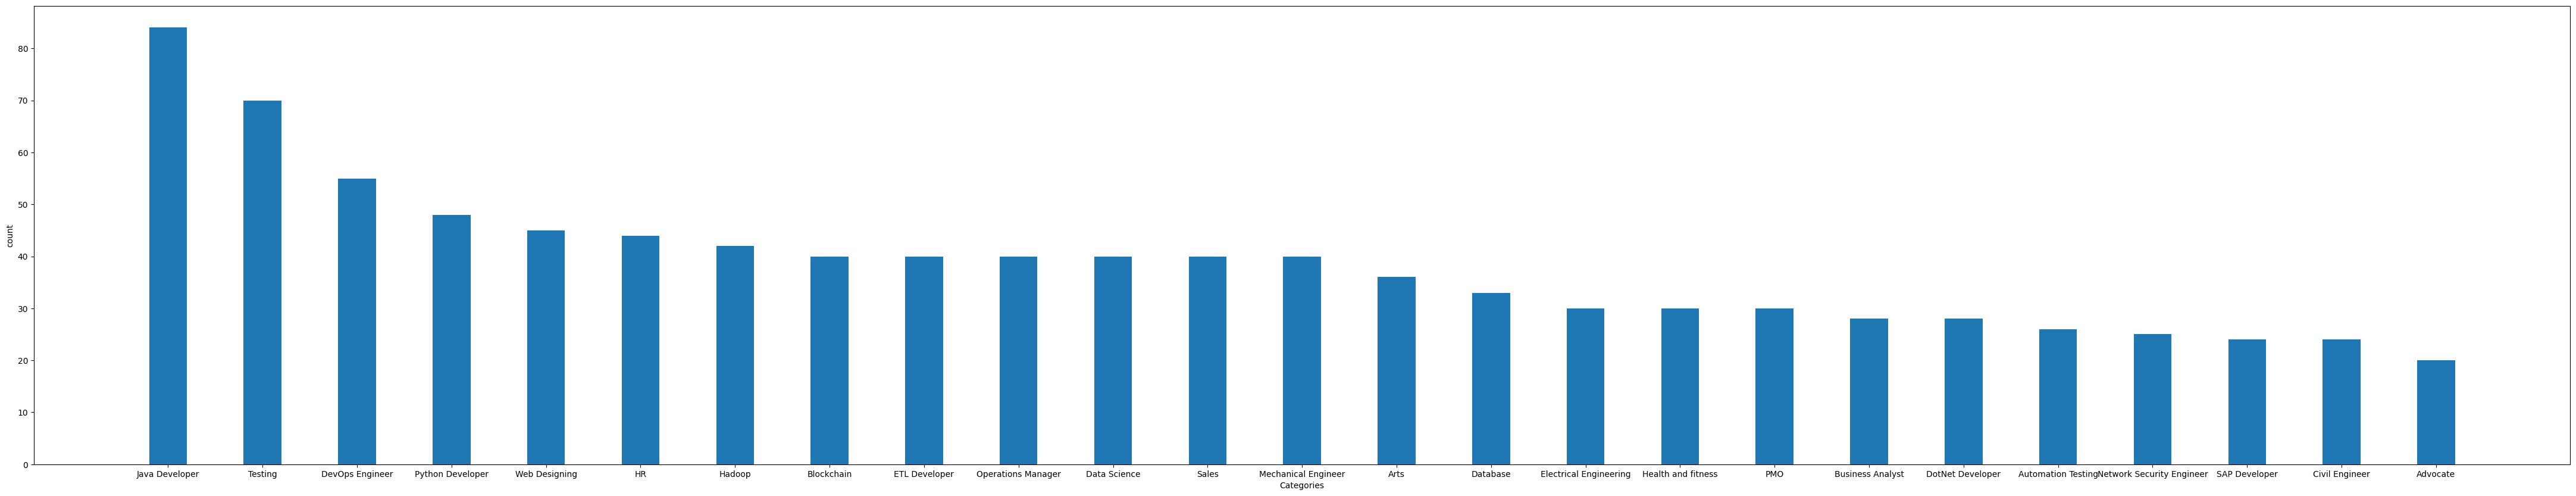

In [11]:
fig=plt.figure(figsize=(55,10))
plt.bar(df['Category'].value_counts().keys(),df['Category'].value_counts().values,width=0.4)
plt.xlabel('Categories')
plt.ylabel('count')

# Merging Category and Resume column for finding matching words and phrases

In [12]:
df['info']=df['Category']+' '+df['Resume']

# Removing Punctuations in newly creating info column

In [13]:
def remove_punc(text):
  text_nonpunc=''.join([char for char in text if char not in string.punctuation])
  return text_nonpunc
df['clean_punc']=df['info'].apply(lambda x:remove_punc(x))
df.to_csv('after_remove_punc',index=False)

# Tokenization

In [14]:
def token(text):
  tokens=re.split('\W+',text)
  return tokens
df['after_tokenization']=df['info'].apply(lambda x:token(x))
df.to_csv('after_tokenization.csv',index=False)

# pos tagging

In [15]:
from nltk import pos_tag
def pos_tag(text):
  pos_text=nltk.pos_tag(text)
  return pos_text
df['after_pos_tagging']=df['after_tokenization'].apply(lambda x:pos_tag(x))
df.to_csv('after_pos_tagging.csv',index=False)

# Removing stopwords

In [16]:
stop_words=set(stopwords.words('english'))
def remove_stopword(text):
  re_sw=[word for word in text if word not in stop_words]
  return re_sw
df['remove_sw']=df['after_tokenization'].apply(lambda x:remove_stopword(x))
df.to_csv('after_re_sw.csv',index=False)

# Lemmatization

In [17]:
ln=nltk.WordNetLemmatizer()
def lemm(text):
  z=[ln.lemmatize(word) for word in text]
  return z
df['after_lemmatization']=df['remove_sw'].apply(lambda x:lemm(x))
df.to_csv('after_lemmatization.csv',index=False)

In [18]:
nlp = spacy.load("en_core_web_sm")

# Displaying Noun phrases in each column

In [19]:
def noun_phrases(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [chunk.text for chunk in doc.noun_chunks]
df['noun_phrases']=df['after_lemmatization'].apply(lambda x:noun_phrases(x))
df['noun_phrases']

0      [Data Science Skills Programming Languages Pyt...
1      [Data Science Education Details May 2013 May 2...
2      [Data Science Areas Interest Deep Learning Con...
3      [Data Science Skills â R â Python, SAP, HANA, ...
4      [Data Science Education Details MCA YMCAUST Fa...
                             ...                        
957    [Computer Skills â Proficient MS office, Word ...
958    [Testing â Willingness, challenge, Positive th...
959    [Testing PERSONAL SKILLS â Quick learner â Eag...
960    [Testing COMPUTER SKILLS SOFTWARE, KNOWLEDGE M...
961    [Testing Skill Set OS Windows XP, 2012 Languag...
Name: noun_phrases, Length: 962, dtype: object

# Displaying Verb forms in each column

In [20]:
def verb_forms(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [token.lemma_ for token in doc if token.pos_ == "VERB"]
df['verb_forms']=df['after_lemmatization'].apply(lambda x:verb_forms(x))
df['verb_forms']

0      [learn, learn, boost, embed, model, understand...
1      [learn, sagar, deploy, learn, miss, encode, sc...
2      [ltspice, ENTHUSIAST, excel, mathematic, work,...
3      [learn, involve, analyse, come, give, carry, p...
4                                                     []
                             ...                        
957    [test, work, motivate, check, follow, conduct,...
958    [accept, declare, mention, bear, mention, perf...
959    [learn, conduct, prepare, inverter, set, cause...
960                             [wind, use, use, design]
961    [test, report, handle, test, execute, coordina...
Name: verb_forms, Length: 962, dtype: object

# Displaying named entities

In [21]:
def named_entities(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [entity.text for entity in doc.ents]
df['named_entities']=df['after_lemmatization'].apply(lambda x:named_entities(x))
df['named_entities']

0      [Sql Java JavaScript JQuery Machine, Cassandra...
1      [Data Science Education, May 2013, May 2017, M...
2      [Data Science Areas Interest Deep Learning Con...
3      [Tableau, SAP HANA, SAP HANA PAL, SAP Lumira, ...
4      [Data Science Education Details, Haryana Data ...
                             ...                        
957    [Word Basic Excel Power point, Bachelor Electr...
958    [Team Player, June 2015, June 2012, Abacus Ele...
959    [Eagerness, Competitive, January 2012, January...
960    [MS Power Point MS Office C Protius PCB Design...
961    [Skill Set OS, 2005 2008 2012, January 2016, J...
Name: named_entities, Length: 962, dtype: object

# Merging noun phrases,verb forms,named entities as a single column to find the matched words & phrases

In [22]:
def string(text):
  return set(' '.join([char for char in text]).lower().split(' '))
df['total_words']=(df['noun_phrases']+df['verb_forms']+df['named_entities']).apply(lambda x:string(x))
df['total_words']

0      {monitor, usa, python, dimensionality, option,...
1      {holt, python, dimensionality, research, proph...
2      {tech, python, xampp, jupyter, intermediate, e...
3      {monitor, python, algorithm, sql, extract, pri...
4      {python, database, c, itechpower, faridabad, e...
                             ...                        
957    {cable, solutions, research, transformer, use,...
958    {mention, ltd, june, c, thinking, analyze, ele...
959    {coil, ltd, temperature, inverter, new, resear...
960    {diploma, office, c, use, project, mini, board...
961    {fix, tech, ltd, mcs, project, wanless, report...
Name: total_words, Length: 962, dtype: object

In [23]:
df['total_words'][0]

{'24',
 '4',
 '6',
 'accelerate',
 'accelerating',
 'accounting',
 'action',
 'address',
 'analysis',
 'analytic',
 'analytics',
 'analyze',
 'and',
 'anomaly',
 'answer',
 'ask',
 'assist',
 'assisted',
 'associate',
 'assurance',
 'automate',
 'automated',
 'base',
 'based',
 'bayes',
 'blob',
 'boost',
 'bootstrap',
 'bot',
 'build',
 'case',
 'cassandra',
 'category',
 'chain',
 'chat',
 'chatbot',
 'classification',
 'classifier',
 'client',
 'clients',
 'cloud',
 'code',
 'coding',
 'comment',
 'company',
 'content',
 'core',
 'cosine',
 'cost',
 'counter',
 'create',
 'created',
 'css',
 'customer',
 'customize',
 'customized',
 'cv',
 'd3',
 'dashboard',
 'data',
 'database',
 'dc',
 'decision',
 'deep',
 'description',
 'details',
 'develop',
 'developed',
 'development',
 'different',
 'dimensionality',
 'discovery',
 'dispute',
 'doc2vec',
 'docker',
 'domain',
 'e',
 'education',
 'effective',
 'elastic',
 'elasticsearch',
 'embed',
 'end',
 'ensure',
 'entire',
 'ernst',
 

# Creating the no of skills matching column in each resume

In [24]:
def ct(text):
  count=0
  for i in text:
    if i in skills_list:
      count+=1
  return count

df['skills_matched']=df['total_words'].apply(lambda x:ct(x))
df

,Category,Resume,info,clean_punc,after_tokenization,after_pos_tagging,remove_sw,after_lemmatization,noun_phrases,verb_forms,named_entities,total_words,skills_matched
0,Data Science,Skills * Programming Languages: Python (pandas...,Data Science Skills * Programming Languages: P...,Data Science Skills Programming Languages Pyt...,"[Data, Science, Skills, Programming, Languages...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, Programming, Languages...","[Data, Science, Skills, Programming, Languages...",[Data Science Skills Programming Languages Pyt...,"[learn, learn, boost, embed, model, understand...","[Sql Java JavaScript JQuery Machine, Cassandra...","{monitor, usa, python, dimensionality, option,...",48
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science Education Details \r\nMay 2013 to...,Data Science Education Details \r\nMay 2013 to...,"[Data, Science, Education, Details, May, 2013,...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, May, 2013,...","[Data, Science, Education, Details, May, 2013,...",[Data Science Education Details May 2013 May 2...,"[learn, sagar, deploy, learn, miss, encode, sc...","[Data Science Education, May 2013, May 2017, M...","{holt, python, dimensionality, research, proph...",13
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Data Science Areas of Interest Deep Learning, ...",Data Science Areas of Interest Deep Learning C...,"[Data, Science, Areas, of, Interest, Deep, Lea...","[(Data, NNP), (Science, NNP), (Areas, NNP), (o...","[Data, Science, Areas, Interest, Deep, Learnin...","[Data, Science, Areas, Interest, Deep, Learnin...",[Data Science Areas Interest Deep Learning Con...,"[ltspice, ENTHUSIAST, excel, mathematic, work,...",[Data Science Areas Interest Deep Learning Con...,"{tech, python, xampp, jupyter, intermediate, e...",20
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,"[Data, Science, Skills, â, R, â, Python, â, SA...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data Science Skills â R â Python, SAP, HANA, ...","[learn, involve, analyse, come, give, carry, p...","[Tableau, SAP HANA, SAP HANA PAL, SAP Lumira, ...","{monitor, python, algorithm, sql, extract, pri...",48
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science Education Details \r\n MCA YMCA...,Data Science Education Details \r\n MCA YMCA...,"[Data, Science, Education, Details, MCA, YMCAU...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, MCA, YMCAU...","[Data, Science, Education, Details, MCA, YMCAU...",[Data Science Education Details MCA YMCAUST Fa...,[],"[Data Science Education Details, Haryana Data ...","{python, database, c, itechpower, faridabad, e...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Testing Computer Skills: â¢ Proficient in MS ...,Testing Computer Skills â¢ Proficient in MS o...,"[Testing, Computer, Skills, â, Proficient, in,...","[(Testing, VBG), (Computer, NNP), (Skills, NNP...","[Testing, Computer, Skills, â, Proficient, MS,...","[Testing, Computer, Skills, â, Proficient, MS,...","[Computer Skills â Proficient MS office, Word ...","[test, work, motivate, check, follow, conduct,...","[Word Basic Excel Power point, Bachelor Electr...","{cable, solutions, research, transformer, use,...",12
958,Testing,â Willingness to accept the challenges. â ...,Testing â Willingness to accept the challeng...,Testing â Willingness to accept the challeng...,"[Testing, â, Willingness, to, accept, the, cha...","[(Testing, VBG), (â, JJ), (Willingness, NNP), ...","[Testing, â, Willingness, accept, challenges, ...","[Testing, â, Willin

# Displaying the top-10 resumes which matched more number of skills

In [25]:
df.sort_values(by='skills_matched',inplace=True,ascending=False)
df[['Category','Resume','skills_matched']].head()

,Category,Resume,skills_matched
37,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
17,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
27,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
0,Data Science,Skills * Programming Languages: Python (pandas...,48


# Resumes which skills matched more than 40

In [26]:
df[df['skills_matched']>=40][['Category','Resume','skills_matched']]

,Category,Resume,skills_matched
37,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
17,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
27,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
0,Data Science,Skills * Programming Languages: Python (pandas...,48
33,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
23,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
30,Data Science,Skills * Programming Languages: Python (pandas...,48
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
10,Data Science,Skills * Programming Languages: Python (pandas...,48


In [28]:
len(df[df['skills_matched']>=40][['Category','Resume','skills_matched']])

44

# There are 34 resumes which the number of skills matched is more than 40

# Skills matching values & their record counts

In [27]:
df['skills_matched'].value_counts()

14    80
6     52
11    52
13    50
9     49
5     47
4     41
16    37
21    36
12    32
29    31
19    31
15    30
22    30
25    29
20    28
26    28
10    24
17    22
38    20
18    20
30    18
23    16
28    16
45    16
8     14
31    13
32    10
40    10
37    10
24     9
48     8
35     8
36     6
3      6
33     6
7      6
46     6
34     5
49     4
27     4
1      2
Name: skills_matched, dtype: int64

Text(0.5, 1.0, 'Skill matching values count in different ranges')

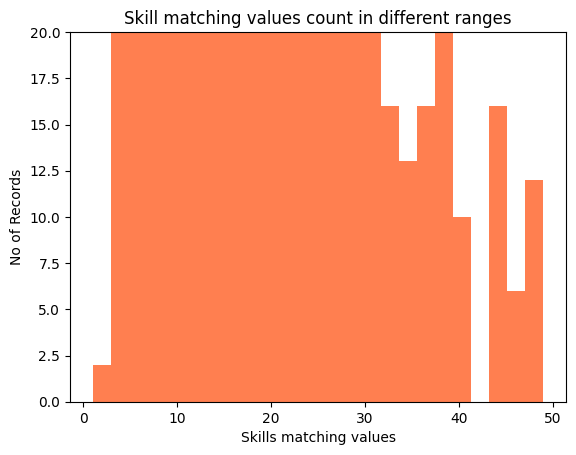

In [29]:
plt.hist(df['skills_matched'],bins=25,color='coral')
plt.ylim(0,20)
plt.xlabel('Skills matching values')
plt.ylabel('No of Records')
plt.title('Skill matching values count in different ranges')